In [1]:
import collections

import numpy as np
import pandas as pd
from inspyred.ec.analysis import fitness_statistics, generation_plot
from simanneal import Annealer
import math
from random import Random
from inspyred import ec #ec staat voor Evolutionary computation
from random import Random, randrange, random

In [30]:
# Using simulated annealing
class RastriginProblem(Annealer): ##Een klasse die overerft van de Annealer klasse uit package simanneal
# 1. Maak een energyfunctie (objective function, optimalisatie-functie)
# De annaeler minimaliseert
 def energy(self): #Dit geeft terug hoe goed de oplossing is.
   s = self.state
   return -10 * len(s)+((s**2-10*np.cos(2*np.pi*s))).sum()

# 2. Bepaal de move functie. Waarbij je een nieuwe oplossing maakt die in de buurt ligt van de vorige oplossing.
 def move(self): #Implementatie van de move klasse
   # We wijzigen 1 van de variabelen uit de oplossings-array naar een nieuwe waarde
   s =self.state
   changing_index = np.random.randint(0,len(s)) #We geven gewoon één van de waarden van de solution een nieuwe waarde
   s[changing_index]+=np.random.normal(0,0.5,1)
   s = np.clip(s, a_min=-5.12, a_max=5.12)

In [34]:
init_sol = np.random.uniform(-5.12,5.12, size=9)

In [35]:

rastrigin=RastriginProblem(init_sol)
rastrigin.Tmax =100000
rastrigin.steps = 50000
rastrigin.updates = 100
rastrigin.Tmin = 100


solution, best = rastrigin.anneal()
print(solution)
best

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
C:\Users\overvelj\AppData\Local\Temp\ipykernel_548\3425154092.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  s[changing_index]+=np.random.normal(0,0.5,1)


[-3.05851755 -5.89086066  0.96137751  1.43163902 -2.09080701 -0.9297615
  3.0547139   0.1051886   1.37649879]


-71.8125697694228

# Genetic algorithms

[-1.97424022e+00 -9.69151530e-01 -1.34762358e-02  1.00284597e+00
  4.97116437e-02  5.39145780e-05 -3.42679077e-01 -8.82970432e-01]
25.664986516608735


{'best': 25.664986516608735,
 'worst': 105.6068899611044,
 'mean': 69.29273199497601,
 'median': 72.33423143537564,
 'std': 19.07209002759392}

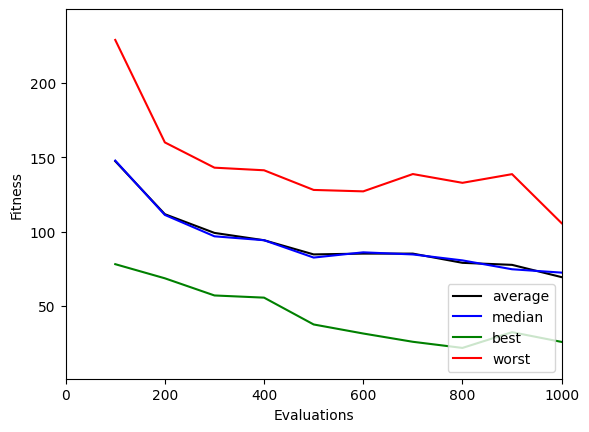

In [12]:
#Genetische algoritmen
#Rastrigin revisited

#Geen initial solution nodig, wel een functie die een solution genereert. 
#De library gebruikt deze functie om een populatie te maken.
def generate(random = None, args =  None) -> []:
     size = args.get('num_inputs',2)
     return np.random.uniform(low=-5.12, high=5.12, size=size)

#Evalueert voor een set van oplossingen (een populatie) de fitness.
# Wij verwijzen hier naar een afzonderlijke objective function (aka Fitness function, energy function, maximalisatiefunctie...)
# De return is een array van oplossingen.
def evaluate(candidates, args = {}):
    fitness = []
    for candidate in candidates:
       fitness.append(obj_func(candidate))
    return fitness

#Equivalent van de energy functie. Bij inspyred kan je bij de uitvoering kiezen tussen minimalisatie of maximalisatie. Je moet de functie dus niet omkeren door er een min voor te zetten.

def obj_func(solution):
    return (10 * len(solution))+(solution**2-10*np.cos(2*np.pi*solution)).sum()


#
from inspyred import ec #ec staat voor Evolutionary computation
from random import Random
rand = Random()
ga = ec.GA(rand)

#

#Stel de juiste ga.variators in: 
 # Kies een cossover variator en een mutatie variator
ga.variator=[ec.variators.arithmetic_crossover, ec.variators.gaussian_mutation]
# arithmetic_crossover = een crossover die werkt met kommagetallen. De crossover is een gewogen som van de ouders. [vb. 10 en 5 kan 7 en 8 worden] .
#ec.variators.gaussian_mutation = de mutatie is een normaalverdeling rond de huidige waarde van de oplossing.
ga.observer = ec.observers.plot_observer #Zorgt ervoor dat je een plot krijgt die de evalutie toont
ga.terminator = ec.terminators.evaluation_termination #Geeft aan wanneer hij moet stoppen.  

population = ga.evolve(
    generator =generate,
    selector = ec.selectors.tournament_selection,
    bounder = ec.Bounder(-5.12, 5.12),
    evaluator = evaluate,
    ax_alpha = 0.3,
    max_evaluations = 1000,
    mutation_rate = 0.1,
    num_inputs = 8,
    maximize = False
)

print(population[0].candidate)
print(population[0].fitness)
ec.analysis.fitness_statistics(population)

[-0.00940678  0.00056301] : 0.017613035096271545


{'best': 0.017613035096271545,
 'worst': 25.542736015585568,
 'mean': 1.8340531840914194,
 'median': 0.13324120788526272,
 'std': 4.7537741502858255}

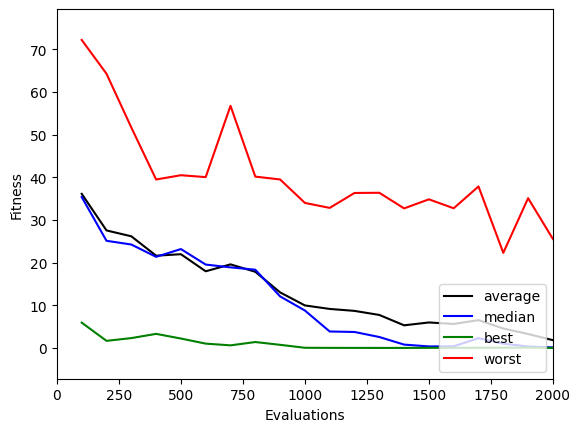

In [11]:

ga.observer = ec.observers.plot_observer #Zorgt ervoor dat je een plot krijgt die de evalutie toont
ga.terminator = ec.terminators.evaluation_termination #Geeft aan wanneer hij moet stoppen.
ga.variator = [ec.variators.arithmetic_crossover, ec.variators.gaussian_mutation] # Geeft aan hoe de crossover werkt en hoe mutaties moeten toegepast worden. De crossover in dit voorval kan om met kommagetallen.
ga.replacer = ec.replacers.random_replacement #Geeft aan op welke manier

population = ga.evolve(
    generator=generate, #De heuristiek moet weten hoe een oplossing kan aangemaakt worden. Dit betreft de initiële populatie
    evaluator=evaluate, #De objective functie die van toepassing is.
    selector = ec.selectors.tournament_selection, #optioneel
    pop_size=100,
    maximize=False,
    bounder=ec.Bounder(-5.12, 5.12),
    max_evaluations=2000,
    mutation_rate=0.10,
    num_inputs=2)
population.sort(reverse=True)
print(population[0])
ec.analysis.fitness_statistics(population)

In [62]:

import inspyred
from inspyred import ec
from random import Random

def generate(random = None, args =  None) -> []:
    dm = args.get('distance_matrix',[])
    size = int(math.sqrt(len(dm)))
    #Create a random but valid solution for the TSP problem
    solution = np.zeros(size*size,dtype=int)
    for i in range (0, size):
        j = np.random.randint(low=0, high=size)
        solution[i*size+j]=1
    return solution.tolist()

def evaluate(candidates, args = {}):
    weights = args.get('distance_matrix',[])
    fitness = []
    for candidate in candidates:
        fitness.append(obj_func(candidate,weights))
    return fitness

def obj_func(solution, weights):
    n=int(math.sqrt(len(solution))) #Het aantal steden
    matrix_solution = np.array(solution).reshape(n,n)
    leaveOK=matrix_solution.sum(axis=0) #Tel in de matrix de som van de kolommen op
    arriveOK=matrix_solution.sum(axis=1) #Tel in de matrix de som van de rijen op
    notStayingOK = np.diag(matrix_solution).sum()
     #No subloops or infinite loop but one loop with length n
    loop_length = 0;
    city=0
    in_loop = True
    while(in_loop & (loop_length < n+1)):
        loop_length = loop_length + 1
        index = range(city*n,(city+1)*n, 1) # row of city
        next_city = 0
        while ((solution[index[next_city]] == 0) & (next_city < n-1)): next_city=next_city+1
        in_loop = (next_city != 0) & (solution[index[next_city]] == 1)
        city = next_city
    #Test if all of the conditions are fulfilled
    if (    (notStayingOK == 0) &
            (np.min(arriveOK) == 1) &
            (np.max(arriveOK) == 1) &
            (np.sum(arriveOK) == n) &
            (np.min(leaveOK) == 1) &
            (np.max(leaveOK) == 1) &
            (np.sum(leaveOK) == n) &
            (loop_length == n)          ):
        score=np.sum(np.multiply(solution, weights))  #value objective function
    else:
        score=10000*n #not a feasible solution, so very bad value for the objective function
    return score

In [36]:
#Test the generate
solution = generate(None, {'num_cities':5})
solution
n = 5

leaveOK=np.empty((n,1), dtype=int) #Initialiseren
for i in range(0,n): #0..4
    index = range(i,n*n, n) #0,5,10,15,20
    leaveOK[i] = 0
    for j in index: leaveOK[i] = leaveOK[i] + solution[j]
    #Arrive in each city once
leaveOK

solution = np.array(solution)
np.array(solution).reshape(5,5).sum(axis=0)

n = 5


    
    

[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]

array([[1],
       [1],
       [1],
       [2],
       [0]])

array([1, 1, 1, 2, 0])

[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0] : 500


{'best': 500, 'worst': 500, 'mean': 500.0, 'median': 500.0, 'std': 0.0}

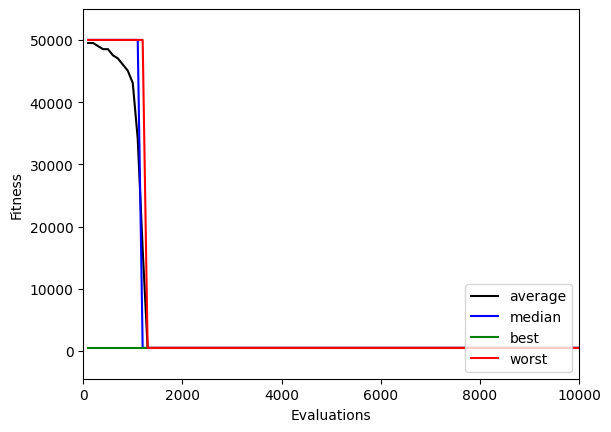

In [63]:


distance_matrix = [0, 100, 125, 100, 75, 100, 0, 50, 75, 125, 125, 50, 0, 100, 125, 100, 75, 100, 0, 50, 75, 125, 125,
                   50, 0]

rand = Random()
ga = ec.GA(rand)
ga.observer = ec.observers.plot_observer
ga.terminator = ec.terminators.evaluation_termination
ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation]
ga.replacer = ec.replacers.plus_replacement #nieuwe genaratie alle beste van de ouders en offspring van de vorige generatie
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    selector = ec.selectors.fitness_proportionate_selection, # roulette
    pop_size=100,
    maximize= False,
    bounder=ec.DiscreteBounder([0,1]),
    max_evaluations=10000,
    mutation_rate=0.01,
    num_crossover_points = 3,
    distance_matrix=distance_matrix
    )
print(population[0])
ec.analysis.fitness_statistics(population)

## Oefeningen

### Gutter

#### SIM AN

In [13]:
class VolumeProblem(Annealer):
    def energy(self):
        s = self.state
        return -s*(1-s/2)

    def move(self):
        s = self.state
        s += np.random.normal(0, 0.1, 1)

init_sol = np.random.uniform(0.1, 1, size=1)
rastrigin = VolumeProblem(init_sol)
rastrigin.Tmax = 100000
rastrigin.steps = 1000
rastrigin.updates = 5000
rastrigin.Tmin = 100

solution, best = rastrigin.anneal()
print(solution)
print(best)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


[0.99867634]
[-0.49999912]


In [14]:
class GutterProblem(Annealer):
    def energy(self):
        b = self.state[0]
        h = (1 - b)/2
        return -b*h

    def move(self):
        self.state += np.random.normal(0,0.1,1)
        return

init_sol = [0]

gutter=GutterProblem(init_sol)
gutter.Tmax =100000
gutter.steps = 1000
gutter.updates = 5000
gutter.Tmin = 100

#Doelfunctie resultaat van de initiële oplussing
gutter.energy()
gutter.anneal()
#initial solution


0.0

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


(array([0.50791648]), -0.12496866469789193)

#### GA

[0.95791564] : [-0.49911445]


{'best': array([-0.49911445]),
 'worst': array([-0.]),
 'mean': -0.377280477465079,
 'median': -0.49911445344291544,
 'std': 0.18965363177356664}

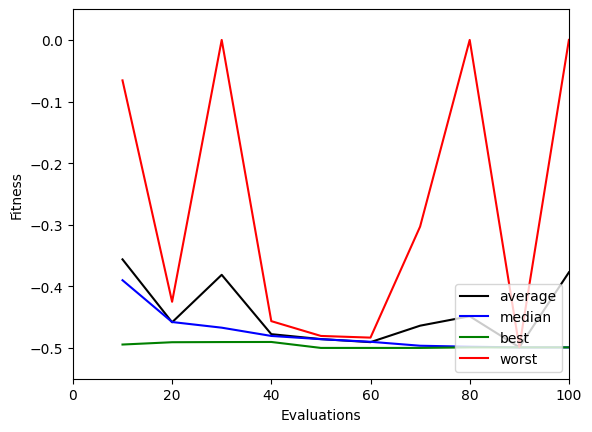

In [16]:
from inspyred import ec #ec staat voor Evolutionary computation
from random import Random

#Geen initial solution nodig, wel een functie die een solution genereert
def generate(random = None, args =  None) -> []:
     return np.random.uniform(low=0, high=1, size=1)

#Evalueert voor een set van oplossingen de fitness.
# Wij verwijzen hier naar een afzonderlijke objective function (aka Fitness function, energy function, maximalisatiefunctie...)
def evaluate(candidates, args = {}):
    fitness = []
    for candidate in candidates:
       fitness.append(obj_func(candidate))
    return fitness

#Equivalent van de energy functie
def obj_func(s):
    return -s*(1-s/2)



rand = Random()
ga = ec.GA(rand)


ga.observer = ec.observers.plot_observer #Zorgt ervoor dat je een plot krijgt die de evalutie toont
ga.terminator = ec.terminators.evaluation_termination #Geeft aan wanneer hij moet stoppen.
ga.variator = [ec.variators.arithmetic_crossover, ec.variators.gaussian_mutation] # Geeft aan hoe de crossover werkt en hoe mutaties moeten toegepast worden. De crossover in dit voorval kan om met kommagetallen.
ga.replacer = ec.replacers.random_replacement #Geeft aan op welke manier

population = ga.evolve(
    generator=generate, #De heuristiek moet weten hoe een oplossing kan aangemaakt worden. Dit betreft de initiële populatie
    evaluator=evaluate, #De objective functie die van toepassing is.
    selector = ec.selectors.tournament_selection, #optioneel
    pop_size=10,
    maximize=False,
    bounder=ec.Bounder(0, 1),
    max_evaluations=100,
    mutation_rate=0.10,
    num_inputs=2)
population.sort(reverse=True)
print(population[0])
ec.analysis.fitness_statistics(population)

### KNAPSACK

#### SA

In [38]:
df = pd.read_csv('../datasets/Knapsack Items.csv', index_col=0)
weights = df['gewichten(gr)']
values = df['waarde']

class KnapsackProblem(Annealer):
    def energy(self):
        b = self.state
        total_weight = (b * weights).sum()
        total_values = (b * values).sum()
        if total_weight > 750:
            return -(750 - total_weight)
        else:
            return -total_values

    def move(self):
        index= self.state[np.random.randint(0,len(values))]
        if (self.state[index]==0):
            self.state[index]=1
        else:
            self.state[index]=0
        return
    
init_sol = np.random.choice([0,1],len(values)) #initial solution
gutter=KnapsackProblem(init_sol)
gutter.Tmax =100000
gutter.steps = 10000
gutter.updates = 5000
gutter.Tmin = 100


gutter.anneal()


 Temperature        Energy    Accept   Improve     Elapsed   Remaining


(array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]), -1418)

# Genetic algorithms

In [66]:
def obj_funct(weights, values, selection):
    total_weight = (selection* weights).sum()
    total_values = (selection* values).sum()
    if total_weight > 750:
        return total_values/3
    else:
        return total_values

def evaluate(candidates, args = {}):
    weights = args.get('weights', [])
    values = args.get('values', [])
    fitness = []
    for cand in candidates:
        fitness.append(obj_funct(weights,values,cand))
    return fitness

def generate(random = None, args = {}) -> []:
    aantal_voorwerpen = args.get('aantal_voorwerpen',15)
    return np.random.randint(0,2,size=aantal_voorwerpen).tolist()

In [70]:
df = pd.read_csv('../datasets/Knapsack Items.csv', index_col=0)
weights = df['gewicht']
values = df['waarde']

<Individual: candidate = [1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1], fitness = 1451, birthdate = 1716293770.856254>

{'best': 1451,
 'worst': 566.3333333333334,
 'mean': 1293.4666666666667,
 'median': 1305.5,
 'std': 208.09638258375477}

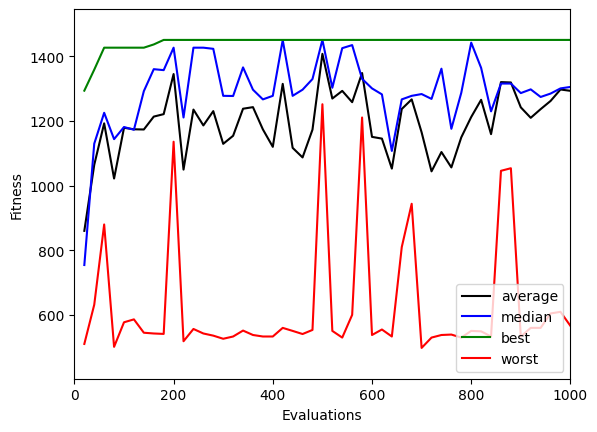

In [71]:
rand = Random()
ga = ec.GA(rand)
ga.observer = ec.observers.plot_observer
ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation]
ga.terminator = ec.terminators.evaluation_termination
population: [ec.Individual] = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    pop_size=20,
    maximize=True,
    bounder=ec.DiscreteBounder([0,1]),
    tournament_size=3,
    num_elites = 2,
    num_crossover_points=2,
    max_evaluations=1000,
    mutation_rate=0.05,
    weights = weights,
    values = values,
    aantal_voorwerpen = values.size)

population.sort(reverse=True)
population[0]
ec.analysis.fitness_statistics(population)


In [24]:
values.size

15

In [19]:
def obj_function(solution):
    return (10 * len(solution)) + ((solution**2 - 10 * np.cos(2 * np.pi * solution))**2).sum()

def evaluate(candidates, args = {}):
    fitness = []
    for candidate in candidates:
        fitness.append(obj_function(candidate))
    return fitness

def generate(random = None, args = None):
    size = args.get('num_inputs', 10)
    return np.random.uniform(low=-5.12, high=5.12, size=size)
from inspyred import ec

rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination
# ga.variator = ec.variators.uniform_crossover
population: [ec.Individual] = ga.evolve(
generator=generate,
evaluator=evaluate,
selector=ec.selectors.tournament_selection,
pop_size=100,
maximize=False,
bounder=ec.Bounder(-5.12, 5.12),
max_evaluations=100000,
mutation_rate=0.10,
num_inputs=30
)
population.sort(reverse=True)
print(population[0])

[-3.05038515 -0.28154219 -2.11993057 -2.14760407 -2.99420773 -2.13402915
 -3.07017185  0.36295065  1.23104876 -3.8901041   2.10808215 -1.19767352
  0.6963696   2.10920855 -0.31750053  3.03217252  2.11101468  2.77625466
  2.87870027  1.84952368 -0.18738288  0.80108324 -3.11027395 -2.08169292
 -3.11540016 -3.2028339  -0.5113098  -3.22308987 -0.35205252  3.04273633] : 851.4185385996368
